In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy import stats

## 1. For the following problems, use python to simulate the problem and calculate an experimental probability, then compare that to the theoretical probability.

### A bank found that the average number of cars waiting during the noon hour at a drive-up window follows a Poisson distribution with a mean of 2 cars. Make a chart of this distribution and answer these questions concerning the probability of cars waiting at the drive-up window.

### a. What is the probability that no cars drive up in the noon hour?

<BarContainer object of 30 artists>

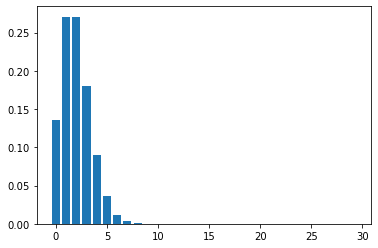

In [2]:
λ = 2 #cars waiting at noon
x = np.arange(0,30)
y = stats.poisson(λ).pmf(x)

plt.bar(x,y)

In [3]:
stats.poisson(λ).pmf(0)

0.1353352832366127

### b. What is the probability that 3 or more cars come through the drive through?

In [4]:
stats.poisson(λ).sf(2)

0.32332358381693654

### c. How likely is it that the drive through gets at least 1 car?

In [5]:
stats.poisson(λ).sf(0)

0.8646647167633873

## 2. Grades of State University graduates are normally distributed with a mean of 3.0 and a standard deviation of .3. Calculate the following:

### a. What grade point average is required to be in the top 5% of the graduating class?


In [6]:
# parameters defining the normal dist
mean = 3
std_dev = 0.3

# Use Scripy Stats module to generte a dist:
gpa = stats.norm(mean, std_dev)

In [7]:
gpa.isf(0.05)

3.4934560880854417

### b. What GPA constitutes the bottom 15% of the class?

In [8]:
gpa.ppf(0.15)

2.689069983151863

### c. An eccentric alumnus left scholarship money for students in the third decile from the bottom of their class. Determine the range of the third decile. Would a student with a 2.8 grade point average qualify for this scholarship?

In [9]:
# 1st decile: 0-10 percentile
# 2nd decile: 10-20 percentile
# 3rd decile: 20-30 percentile

In [10]:
stats.norm(3, 0.3).ppf([0.2, 0.3])

array([2.74751363, 2.84267985])

### d. If I have a GPA of 3.5, what percentile am I in?

In [11]:
stats.norm(3, 0.3).cdf(3.5)

0.9522096477271853

In [12]:
# by Simulation
(np.random.normal(3, 0.3, 100_000) < 3.5).mean()

0.95181

### 3. A marketing website has an average click-through rate of 2%. One day they observe 4326 visitors and 97 click-throughs. How likely is it that this many people or more click through?

In [13]:
# What are the appropriate defining parameters for this distribution?
n_trials = 4326
p = 0.02


stats.binom(4326, 0.02).sf(96)

0.1397582363130086

### 4.You are working on some statistics homework consisting of 100 questions where all of the answers are a probability rounded to the hundreths place. Looking to save time, you put down random probabilities as the answer to each question.

### What is the probability that at least one of your first 60 answers is correct?


In [14]:
n = 60
p = 0.01

stats.binom(n, p).sf(0)

0.4528433576092388

### 5. The codeup staff tends to get upset when the student break area is not cleaned up. Suppose that there's a 3% chance that any one student cleans the break area when they visit it, and, on any given day, about 90% of the 3 active cohorts of 22 students visit the break area. How likely is it that the break area gets cleaned up each day? How likely is it that it goes two days without getting cleaned up? All week?

In [15]:
n = round(0.9 * 3 * 22)
p = 0.03

stats.binom(n, p).sf(0)

0.8342199288437355

Text(0.5, 0, 'Number of time area is cleaned per day')

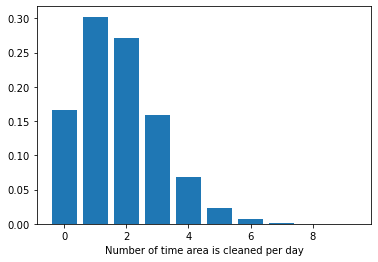

In [16]:
x = np.arange(0, 10)
y = stats.binom(n,p).pmf(x)

plt.bar(x, y)
plt.xlabel('Number of time area is cleaned per day')

In [17]:
#  How likely is it that it goes two days without getting cleaned up?


# How many students would visit the area in two days?

stats.binom(n * 2, p).pmf(0)

0.02748303199257622

In [18]:
# probability of not getting cleaned for a week (5 days)

stats.binom(n * 5, p).pmf(0)

0.00012521651388091353

### 6. You want to get lunch at La Panaderia, but notice that the line is usually very long at lunchtime. After several weeks of careful observation, you notice that the average number of people in line when your lunch break starts is normally distributed with a mean of 15 and standard deviation of 3. If it takes 2 minutes for each person to order, and 10 minutes from ordering to getting your food, what is the likelihood that you have at least 15 minutes left to eat your food before you have to go back to class? Assume you have one hour for lunch, and ignore travel time to and from La Panaderia.

In [19]:
# convert mean and std from people to 'minutes':
mean = 15 * 2 # minutes
std_dev = 3 * 2 # minutes


# Max time I can be in line without getting late to class = 60 - 15 -10 - 2 = 33 mins

stats.norm(mean, std_dev).cdf(33)

0.6914624612740131

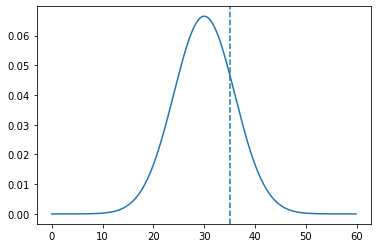

In [20]:
x = np.arange(0, 60 , 0.1)
y = stats.norm(mean, std_dev).pdf(x)

plt.plot(x,y)
plt.axvline(35, ls = '--')
# plt.axvline(45, ls = '--')

In [21]:
(np.random.normal(30, 6, 100_000) <= 33).mean()

0.68984